# **Data Diri**

Nama: Meakhel Gunawan

Kampus: Universitas Negeri Surabaya Teknik Informatika (Semester 6)

Email : meakhel220504@gmail.com

# <font color='yellow'> **Import Library**</font>

In [56]:
!pip install google-play-scraper

In [57]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [58]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

In [59]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#  <font color='yellow'> **Scapping Dataset**</font>

Pada proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "GoPay: Transfer Pulsa Tagihan" di Play Store. Analisis sentimen akan membantu kita untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan mereka terhadap aplikasi ini.

Dengan menggunakan berbagai teknik pemrosesan teks dan algoritma machine learning, kita akan mencoba mengidentifikasi apakah ulasan pengguna terhadap aplikasi "BY.U" cenderung positif, negatif, atau netral. Hasil analisis sentimen ini dapat memberikan wawasan berharga kepada pengembang aplikasi untuk meningkatkan pengalaman pengguna. Mari kita mulai menjelajahi ulasan pengguna dan menganalisis sentimen di sekitar aplikasi "BY.U" dengan lebih mendalam.

In [60]:
# Mengambil semua ulasan dari aplikasi dengan ID 'com.gojek.gopay' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
"""
scrapreview = reviews_all(
    'com.gojek.gopay',       # ID aplikasi
    lang='id',               # Bahasa ulasan (default: 'en')
    country='id',            # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000               # Jumlah maksimum ulasan yang ingin diambil
)

"""

scrapreview = []
batch_size = 30000  # Ambil data dalam batch kecil
while len(scrapreview) < 90000:
    batch, _ = reviews('com.google.android.calendar', lang='id', country='id', sort=Sort.MOST_RELEVANT, count=batch_size)
    scrapreview.extend(batch)

    # Jika jumlah ulasan sudah cukup, hentikan perulangan
    if len(scrapreview) >= 90000:
        scrapreview = scrapreview[:90000]
        break

In [61]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_gcal.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

#  <font color='yellow'> **Loading Dataset**</font>

In [62]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_gcal.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [63]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,49237430-5c8e-4413-ac29-42a9d6cc5527,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi keren untuk lihat tanggal berapa dan ada festival apa, terus juga ada dark modenya untuk buat mata gak cepat lelah, tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal 9 ya buat tanggal di ikon aplikasinya juga 9, cuman ya kalo bisa, kalo gak bisa gapapa",5,125,2024.49.0-703993912-release,2025-01-09 08:30:01,None,NaT,2024.49.0-703993912-release
1,3c1a1d12-ffd0-440a-830f-21132056fef0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Suka banget sama aplikasinya. Kalo mau buat jadwal sampe timeline bisa terukur aja, sama tampilannya menarik buat dilihat. Saran, semisal ada ditambah fitur gambar, misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan?",5,243,2024.42.0-687921584-release,2024-11-03 02:11:08,None,NaT,2024.42.0-687921584-release
2,035885b3-3c5b-4b6f-be27-50738d47ba0e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sinkronisasi di hp sama di laptop suka lama banget. Kalau edit di laptop, di hp ga muncul, dan sebaliknya :""",3,7,2025.02.0-714751346-release,2025-01-25 09:32:52,None,NaT,2025.02.0-714751346-release
3,71572fac-7090-460f-9a8f-17d05d71ac0d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sebenarnya ini app bagus, cuma kendala terbesarnya itu, kalau kita mau buat gcalendar, itu tidak bisa buat di HP, harus di laptop, jadinya terkendala karena tidak punya laptop",5,29,2025.01.1-713312946-release,2025-01-20 11:22:06,None,NaT,2025.01.1-713312946-release
4,9a0a65ca-eeee-46dd-8bb8-d00329af700a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"sangat keren banget membantu.tanpa harus lihat "" kalender di dinding",5,0,2025.05.1-722559100-release,2025-02-13 12:14:03,None,NaT,2025.05.1-722559100-release
...,...,...,...,...,...,...,...,...,...,...,...
89995,2f4b1aa5-eb19-4f4e-935c-002584cd2e63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Yoi,5,0,5.2.4-102744861-release,2016-08-07 03:37:24,None,NaT,5.2.4-102744861-release
89996,11955df2-4cef-4e20-9f6e-8d1d8ebdb6cb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good,5,0,5.2.4-102744861-release,2018-09-08 13:45:49,None,NaT,5.2.4-102744861-release
89997,1bd93697-4ade-4a5e-9610-271d36c91972,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Siiip,5,0,5.2.4-102744861-release,2016-11-02 01:37:23,None,NaT,5.2.4-102744861-release
89998,b78fa0b9-68b5-45e5-ae74-01ad20a8ee58,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Joz,5,0,5.2.4-102744861-release,2020-03-13 13:40:29,None,NaT,5.2.4-102744861-release


In [64]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              90000 non-null  object        
 1   userName              90000 non-null  object        
 2   userImage             90000 non-null  object        
 3   content               89994 non-null  object        
 4   score                 90000 non-null  int64         
 5   thumbsUpCount         90000 non-null  int64         
 6   reviewCreatedVersion  88569 non-null  object        
 7   at                    90000 non-null  datetime64[ns]
 8   replyContent          24 non-null     object        
 9   repliedAt             24 non-null     datetime64[ns]
 10  appVersion            88569 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.6+ MB


In [65]:
# Mengecek nilai null
app_reviews_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,6
score,0
thumbsUpCount,0
reviewCreatedVersion,1431
at,0
replyContent,89976
repliedAt,89976


In [66]:
# Menghapus kolom-kolom yang memiliki banyak nilai NaN, dan juga memang kurang diperlukan untuk Analisis Sentimen
app_reviews_df_new = app_reviews_df.drop(columns=['reviewCreatedVersion','replyContent','repliedAt', 'appVersion'])

In [67]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df_new
clean_df = app_reviews_df_new.dropna()

In [68]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89994 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       89994 non-null  object        
 1   userName       89994 non-null  object        
 2   userImage      89994 non-null  object        
 3   content        89994 non-null  object        
 4   score          89994 non-null  int64         
 5   thumbsUpCount  89994 non-null  int64         
 6   at             89994 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.5+ MB


In [69]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# Mengecek nilai null
clean_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
at,0


#  <font color='yellow'> **Preprocessing**</font>

Menghapus emoji

In [70]:
!pip install emoji

In [71]:
import emoji

# Fungsi untuk mendeteksi emotikon
def contains_emoji(content):
    return any(char in emoji.EMOJI_DATA for char in content)

# Menerapkan fungsi untuk mendeteksi baris yang mengandung emotikon
clean_df['has_emoji'] = clean_df['content'].apply(contains_emoji)

# Menghapus baris yang mengandung emotikon
clean_df = clean_df[~clean_df['has_emoji']].drop(columns=['has_emoji'])

In [72]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]', '', text)  # Remove RT
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'[0-9]+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.replace('\n', ' ')  # Replace new lines with space
    text = text.strip()  # Remove leading/trailing spaces
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian') + stopwords.words('english'))
    listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'])

    filtered_text = [word for word in text if word not in listStopwords]
    return filtered_text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    if isinstance(text, str):  # Jika input string, tokenisasi dulu
        words = text.split()
    else:
        words = text

    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words  # Output tetap list untuk menjaga kompatibilitas

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [73]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "ngk": "tidak", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [74]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Melakukan stemmed  dan menyimpannya di 'text_stemmed'
#clean_df['text_stemmed'] = clean_df['text_stopword'].apply(stemmingText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
#clean_df['text_akhir'] = clean_df['text_stemmed'].apply(toSentence)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [75]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,49237430-5c8e-4413-ac29-42a9d6cc5527,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi keren untuk lihat tanggal berapa dan ada festival apa, terus juga ada dark modenya untuk buat mata gak cepat lelah, tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal 9 ya buat tanggal di ikon aplikasinya juga 9, cuman ya kalo bisa, kalo gak bisa gapapa",5,125,2025-01-09 08:30:01,Aplikasi keren untuk lihat tanggal berapa dan ada festival apa terus juga ada dark modenya untuk buat mata gak cepat lelah tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal ya buat tanggal di ikon aplikasinya juga cuman ya kalo bisa kalo gak bisa gapapa,aplikasi keren untuk lihat tanggal berapa dan ada festival apa terus juga ada dark modenya untuk buat mata gak cepat lelah tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal ya buat tanggal di ikon aplikasinya juga cuman ya kalo bisa kalo gak bisa gapapa,aplikasi keren untuk lihat tanggal berapa dan ada festival apa terus juga ada dark modenya untuk buat mata gak cepat lelah tapi tolong kalau bisa buat tanggal di lambang aplikasinya sesuai tanggal sekarang contoh sekarang tanggal iya buat tanggal di lambang aplikasinya juga cuman iya kalau bisa kalau gak bisa gapapa,"[aplikasi, keren, untuk, lihat, tanggal, berapa, dan, ada, festival, apa, terus, juga, ada, dark, modenya, untuk, buat, mata, gak, cepat, lelah, tapi, tolong, kalau, bisa, buat, tanggal, di, lambang, aplikasinya, sesuai, tanggal, sekarang, contoh, sekarang, tanggal, iya, buat, tanggal, di, lambang, aplikasinya, juga, cuman, iya, kalau, bisa, kalau, gak, bisa, gapapa]","[aplikasi, keren, lihat, tanggal, festival, dark, modenya, mata, cepat, lelah, tolong, tanggal, lambang, aplikasinya, sesuai, tanggal, contoh, tanggal, tanggal, lambang, aplikasinya, cuman, gapapa]",aplikasi keren lihat tanggal festival dark modenya mata cepat lelah tolong tanggal lambang aplikasinya sesuai tanggal contoh tanggal tanggal lambang aplikasinya cuman gapapa
1,3c1a1d12-ffd0-440a-830f-21132056fef0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Suka banget sama aplikasinya. Kalo mau buat jadwal sampe timeline bisa terukur aja, sama tampilannya menarik buat dilihat. Saran, semisal ada ditambah fitur gambar, misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan?",5,243,2024-11-03 02:11:08,Suka banget sama aplikasinya Kalo mau buat jadwal sampe timeline bisa terukur aja sama tampilannya menarik buat dilihat Saran semisal ada ditambah fitur gambar misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan,suka banget sama aplikasinya kalo mau buat jadwal sampe timeline bisa terukur aja sama tampilannya menarik buat dilihat saran semisal ada ditambah fitur gambar misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan,suka banget sama aplikasinya kalau mau buat jadwal sampai timeline bisa terukur saja sama tampilannya menarik buat dilihat saran semisal ada ditambah fitur gambar misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan,"[suka, banget, sama, aplikasinya, kalau, mau, buat, jadwal, sampai, timeline, bisa, terukur, saja, sama, tampilannya, menarik, buat, dilihat, saran, semisal, ada, ditambah, fitur, gambar, misal, buat, nyimpen, memori, setelah, kegiatan, berlangsung, apakah, memungkinkan]","[suka, banget, aplikasinya, jadwal, timeline, terukur, tampilannya, menarik, saran, ditambah, fitur, gambar, nyimpen, memori, kegiatan]",suka banget aplikasinya jadwal timeline terukur tampilannya menarik saran ditambah

In [76]:
clean_df['score'].unique()

array([5, 3, 2, 1, 4])

##Pelabelan


In [77]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [78]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    elif (score==0):
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [79]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    13135
neutral      8606
negative     6152
Name: count, dtype: int64


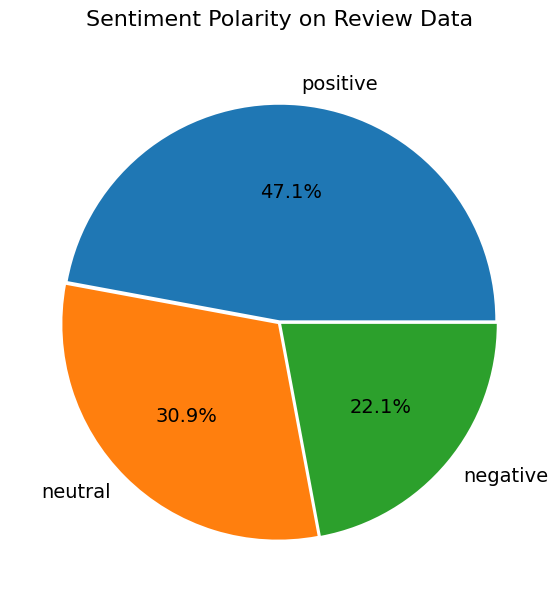

In [80]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (7, 7) inci.
fig, ax = plt.subplots(figsize=(7, 7))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.01 artinya potongan pertama akan sedikit terpisah).
explode = (0.01, 0.01, 0.01)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [81]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [82]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [83]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas negatif.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

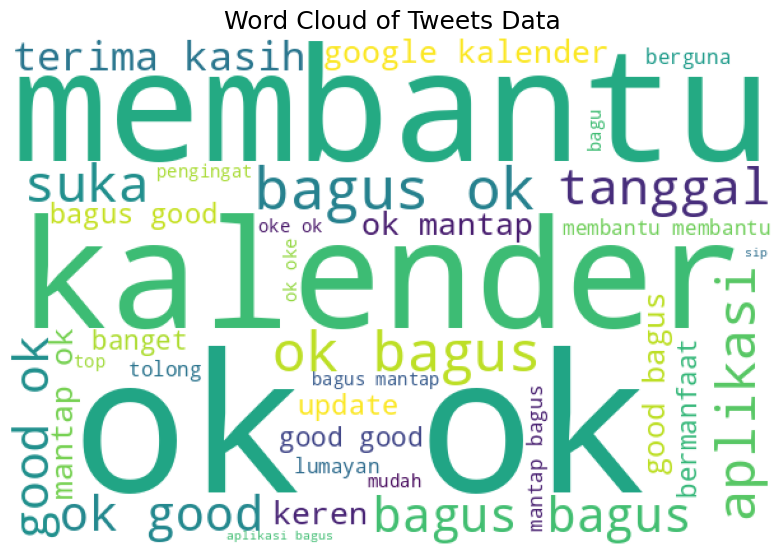

In [84]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

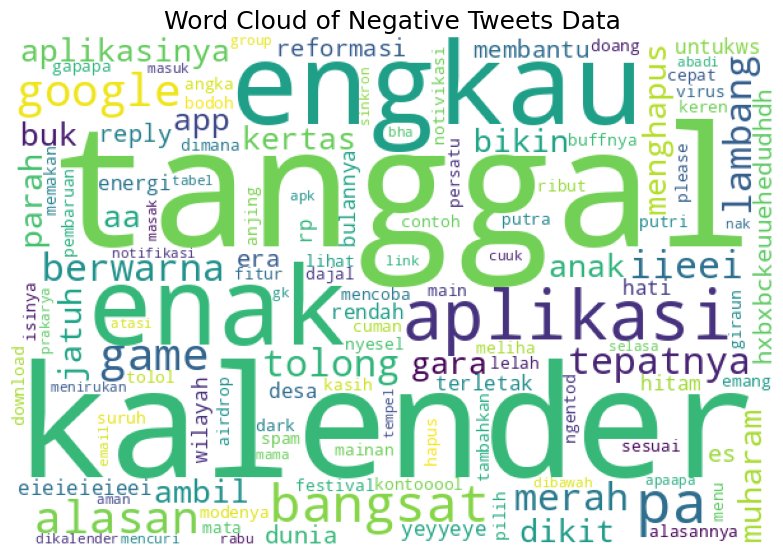

In [85]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

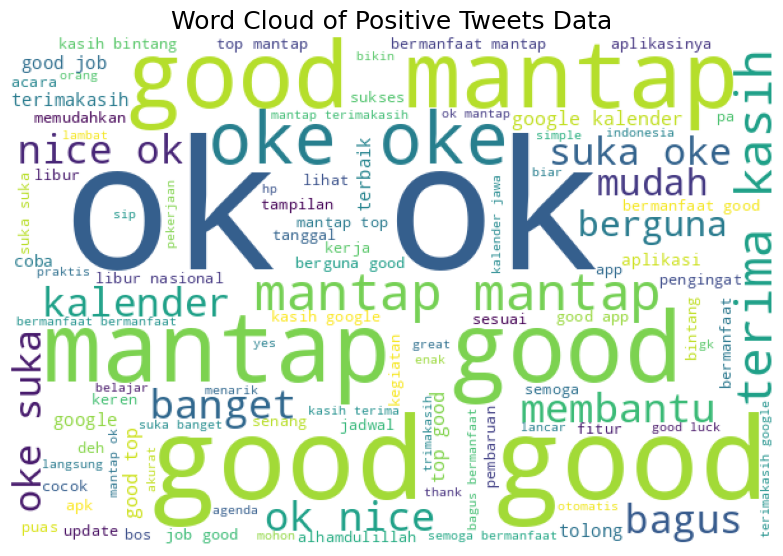

In [86]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

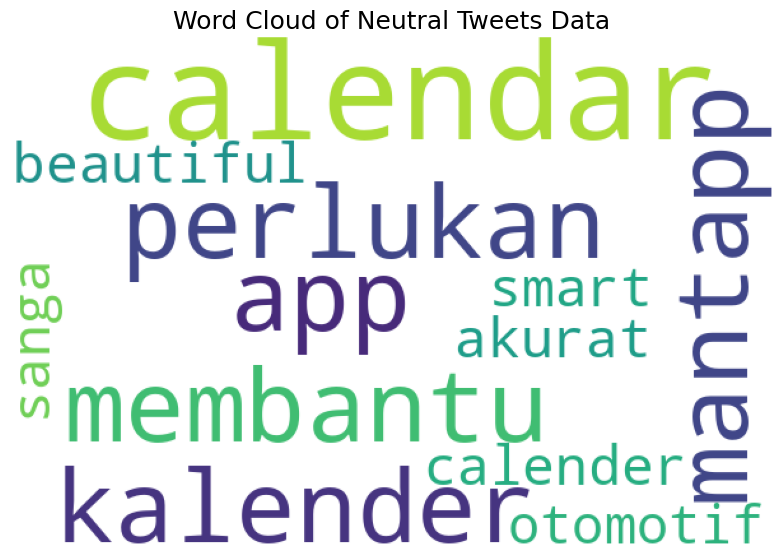

In [87]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

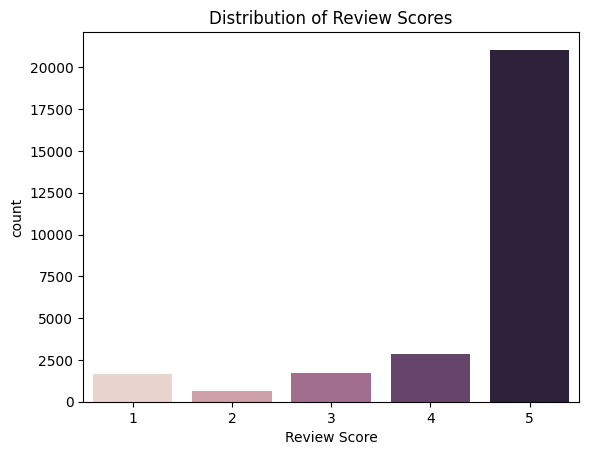

In [88]:
import seaborn as sns

sns.countplot(x='score', data=clean_df, hue='score', dodge=False)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.legend([],[], frameon=False)

plt.show()

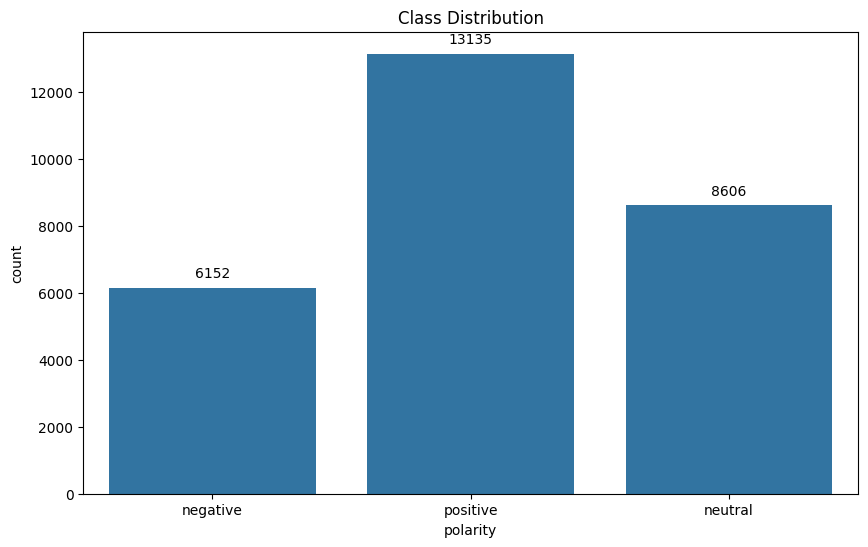

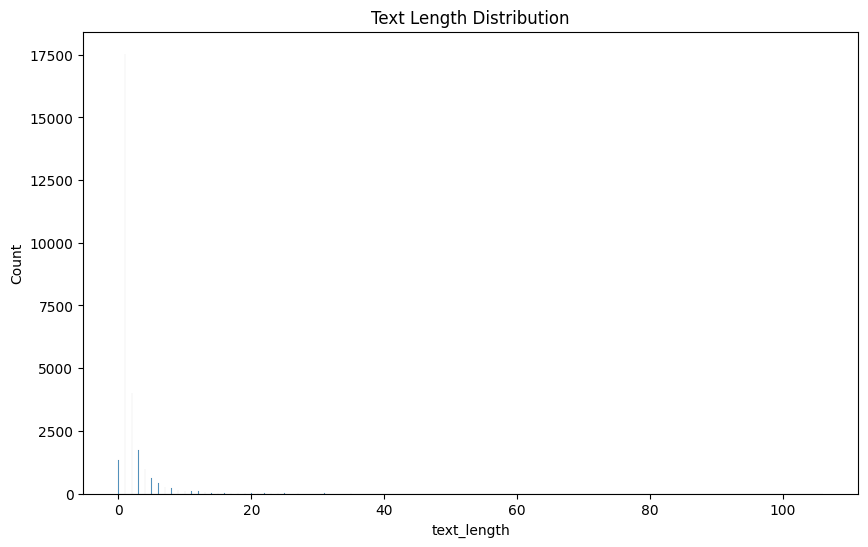

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

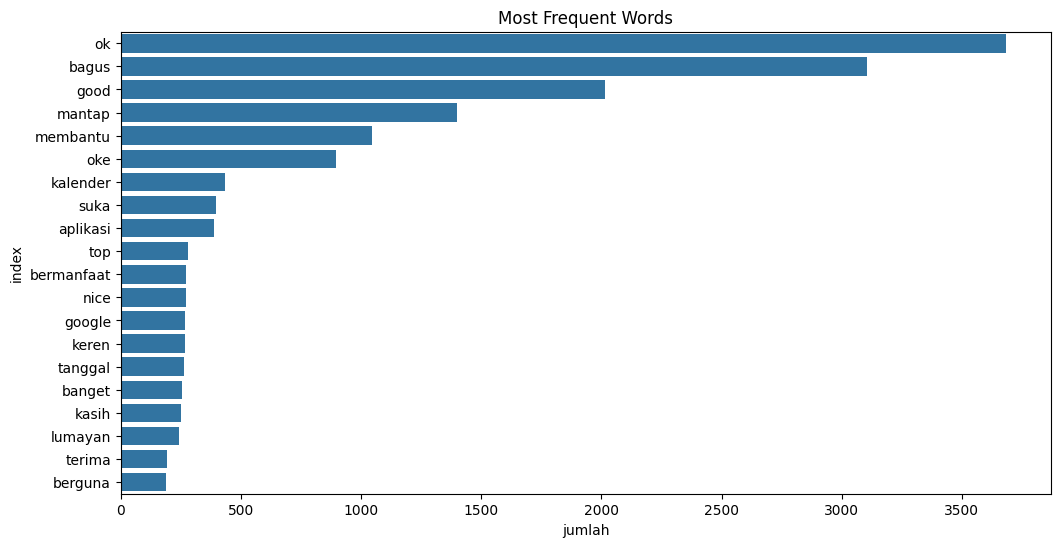

In [90]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

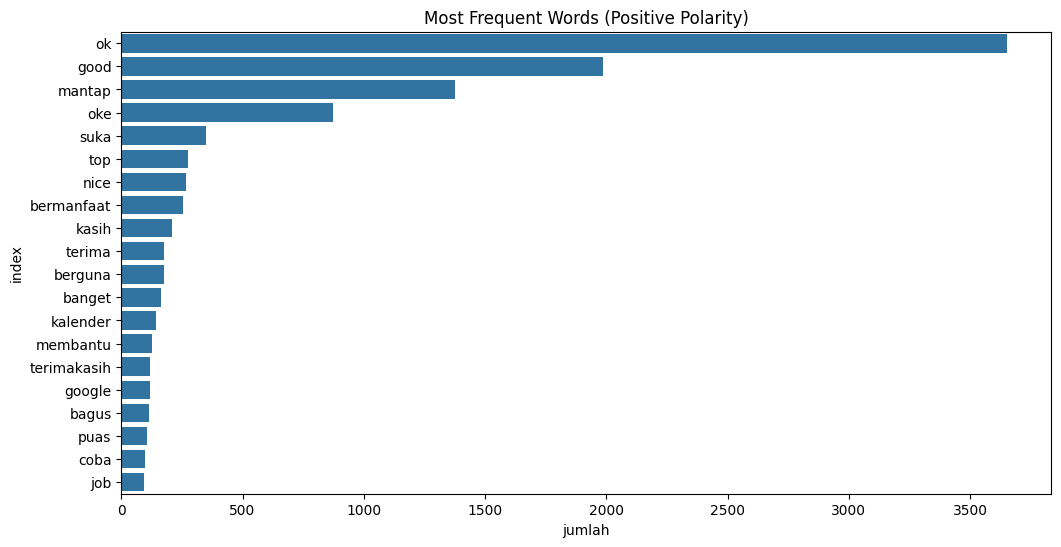

In [91]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words in positive polarity reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(positive_tweets['text_akhir'])  # Gunakan data yang sudah difilter
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

# Plot
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words (Positive Polarity)')
plt.show()

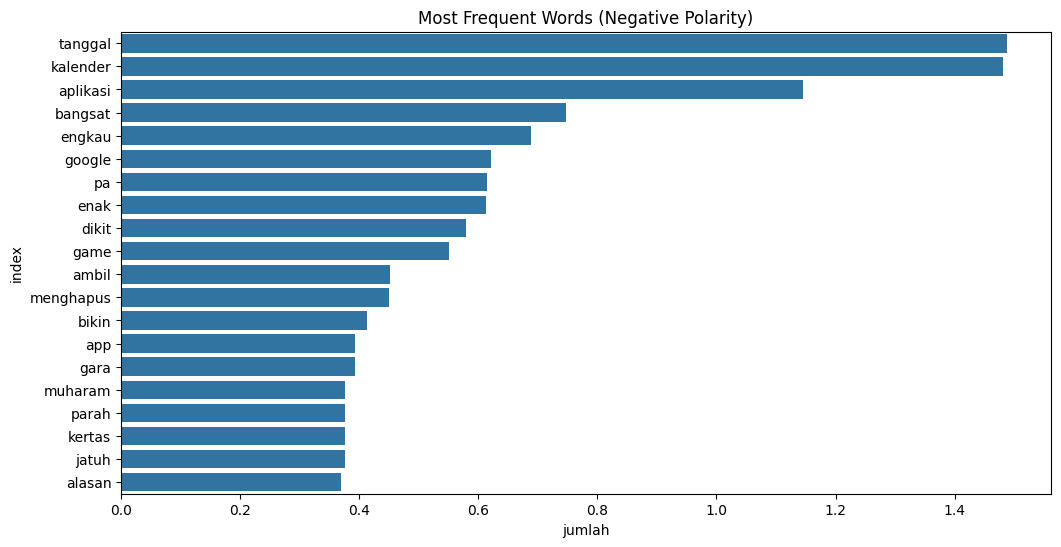

In [92]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words in negative polarity reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(negative_tweets['text_akhir'])  # Gunakan data yang sudah difilter
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

# Plot
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words (Negative Polarity)')
plt.show()


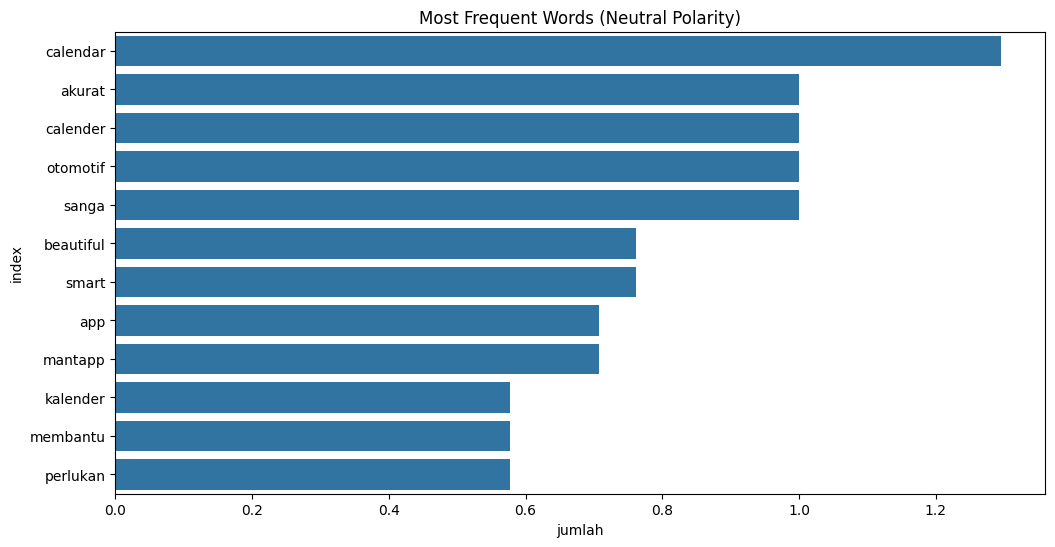

In [93]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words in neutral polarity reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(neutral_tweets['text_akhir'])  # Gunakan data yang sudah difilter
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

# Plot
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words (Neutral Polarity)')
plt.show()


In [94]:
# Buat mapping dari label ke integer
label_mapping = {"positive": 1, "negative": 0, "neutral": 2}

# Ubah nilai kolom 'label' menjadi integer menggunakan mapping
clean_df['label'] = clean_df['polarity'].map(label_mapping)
clean_df['label'] = clean_df['label'].astype(int)

#  <font color='yellow'> **Modelling**</font>

1. SVM + TF-IDF + 80/20
2. XGBoost + Word2Vec + 70/30
3. LSTM (Recurrent Neural Network) + Word Embedding + 80/20

In [95]:
print(f'Terdapat {clean_df.shape[0]} sample data')

Terdapat 27893 sample data


In [96]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length,label
0,49237430-5c8e-4413-ac29-42a9d6cc5527,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi keren untuk lihat tanggal berapa dan ada festival apa, terus juga ada dark modenya untuk buat mata gak cepat lelah, tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal 9 ya buat tanggal di ikon aplikasinya juga 9, cuman ya kalo bisa, kalo gak bisa gapapa",5,125,2025-01-09 08:30:01,Aplikasi keren untuk lihat tanggal berapa dan ada festival apa terus juga ada dark modenya untuk buat mata gak cepat lelah tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal ya buat tanggal di ikon aplikasinya juga cuman ya kalo bisa kalo gak bisa gapapa,aplikasi keren untuk lihat tanggal berapa dan ada festival apa terus juga ada dark modenya untuk buat mata gak cepat lelah tapi tolong kalau bisa buat tanggal di ikon aplikasinya sesuai tanggal sekarang contoh sekarang tanggal ya buat tanggal di ikon aplikasinya juga cuman ya kalo bisa kalo gak bisa gapapa,aplikasi keren untuk lihat tanggal berapa dan ada festival apa terus juga ada dark modenya untuk buat mata gak cepat lelah tapi tolong kalau bisa buat tanggal di lambang aplikasinya sesuai tanggal sekarang contoh sekarang tanggal iya buat tanggal di lambang aplikasinya juga cuman iya kalau bisa kalau gak bisa gapapa,"[aplikasi, keren, untuk, lihat, tanggal, berapa, dan, ada, festival, apa, terus, juga, ada, dark, modenya, untuk, buat, mata, gak, cepat, lelah, tapi, tolong, kalau, bisa, buat, tanggal, di, lambang, aplikasinya, sesuai, tanggal, sekarang, contoh, sekarang, tanggal, iya, buat, tanggal, di, lambang, aplikasinya, juga, cuman, iya, kalau, bisa, kalau, gak, bisa, gapapa]","[aplikasi, keren, lihat, tanggal, festival, dark, modenya, mata, cepat, lelah, tolong, tanggal, lambang, aplikasinya, sesuai, tanggal, contoh, tanggal, tanggal, lambang, aplikasinya, cuman, gapapa]",aplikasi keren lihat tanggal festival dark modenya mata cepat lelah tolong tanggal lambang aplikasinya sesuai tanggal contoh tanggal tanggal lambang aplikasinya cuman gapapa,-24,negative,23,0
1,3c1a1d12-ffd0-440a-830f-21132056fef0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Suka banget sama aplikasinya. Kalo mau buat jadwal sampe timeline bisa terukur aja, sama tampilannya menarik buat dilihat. Saran, semisal ada ditambah fitur gambar, misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan?",5,243,2024-11-03 02:11:08,Suka banget sama aplikasinya Kalo mau buat jadwal sampe timeline bisa terukur aja sama tampilannya menarik buat dilihat Saran semisal ada ditambah fitur gambar misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan,suka banget sama aplikasinya kalo mau buat jadwal sampe timeline bisa terukur aja sama tampilannya menarik buat dilihat saran semisal ada ditambah fitur gambar misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan,suka banget sama aplikasinya kalau mau buat jadwal sampai timeline bisa terukur saja sama tampilannya menarik buat dilihat saran semisal ada ditambah fitur gambar misal buat nyimpen memori setelah kegiatan berlangsung apakah memungkinkan,"[suka, banget, sama, aplikasinya, kalau, mau, buat, jadwal, sampai, timeline, bisa, terukur, saja, sama, tampilannya, menarik, buat, dilihat, saran, semisal, ada, ditambah, fitur, gambar, misal, buat, nyimpen, memori, setelah, kegiatan, berlangsung, apakah, memungkinkan]","[suka, banget, aplikasinya, jadwal, timeline, terukur, tampilannya, menarik, saran, ditambah, fitur, gambar, nyimpen, memori, kegiatan]",suka banget aplikasiny

## SVM + TF-IDF + 70/30

In [97]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['label']

In [98]:
from sklearn.model_selection import train_test_split

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [99]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Training SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluasi Model
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# Classification Report dalam bentuk dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(2)
report_df

Accuracy: 93.22%


,precision,recall,f1-score,support
0,0.94,0.87,0.91,1785.00
1,0.98,0.93,0.95,3977.00
2,0.87,0.98,0.92,2606.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.93,8368.00
weighted avg,0.94,0.93,0.93,8368.00


In [100]:
import pickle

# Simpan model SVM
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Simpan vectorizer TF-IDF
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

print("Model SVM dan TF-IDF berhasil disimpan!")

Model SVM dan TF-IDF berhasil disimpan!


### Interface atau Testing

In [101]:
# Load model dan vectorizer
with open('svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

def predict_sentiment(texts):
    # Konversi teks ke TF-IDF menggunakan vectorizer yang sudah dilatih
    transformed_texts = loaded_vectorizer.transform(texts)

    # Prediksi sentimen menggunakan model yang sudah dilatih
    predictions = loaded_model.predict(transformed_texts)

    # Konversi angka menjadi label sentimen
    label_mapping_reverse = {v: k for k, v in label_mapping.items()}
    predicted_labels = [label_mapping_reverse[pred] for pred in predictions]

    return predicted_labels

# Contoh kalimat baru
new_sentences = ["aplikasi bangsat", "kalendarnya mantap dan bermanfaat", "apk kalendar biasa aja"]

# Prediksi sentimen
predicted_labels = predict_sentiment(new_sentences)

# Menampilkan hasil prediksi
for sentence, label in zip(new_sentences, predicted_labels):
    print(f"Sentence: \"{sentence}\" - Predicted Label: {label}")

Sentence: "aplikasi bangsat" - Predicted Label: negative
Sentence: "kalendarnya mantap dan bermanfaat" - Predicted Label: positive
Sentence: "apk kalendar biasa aja" - Predicted Label: neutral


## XGBoost + Word2Vec + 70/30

In [102]:
from gensim.models import Word2Vec

# Melatih Word2Vec
word2vec_model = Word2Vec(sentences=clean_df['text_akhir'], vector_size=100, window=5, min_count=2, workers=4)

# Fungsi untuk mendapatkan vektor rata-rata tiap teks
def text_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)  # Jika kosong, isi dengan nol

# Konversi teks ke vektor
clean_df['text_vector'] = clean_df['text_akhir'].apply(lambda x: text_vector(x, word2vec_model))
X = np.vstack(clean_df['text_vector'])  # Konversi ke bentuk array untuk model ML

# Label (pastikan sudah dalam bentuk numerik)
y = clean_df['label']

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 87.08%

Classification Report:


,precision,recall,f1-score,support
0,0.80,0.81,0.80,1785.00
1,0.89,0.90,0.90,3977.00
2,0.89,0.87,0.88,2606.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.86,0.86,0.86,8368.00
weighted avg,0.87,0.87,0.87,8368.00



Confusion Matrix:


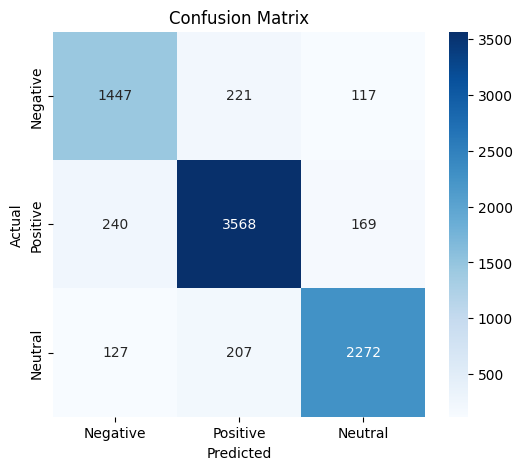

In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Training
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred = xgb_model.predict(X_test)

# Evaluasi Model
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# Classification Report dalam bentuk DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_cr = pd.DataFrame(report_dict).transpose().round(2)
print("\nClassification Report:")
display(report_cr)  # Gunakan display() agar tampil tabel di Jupyter Notebook

# Confusion Matrix dalam bentuk visualisasi
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
labels = ["Negative", "Positive", "Neutral"]  # Sesuaikan dengan jumlah kelas
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [104]:
import pickle

# Simpan model XGBoost
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Simpan model Word2Vec
word2vec_model.save("word2vec.model")

print("Model XGBoost dan Word2Vec berhasil disimpan!")

Model XGBoost dan Word2Vec berhasil disimpan!


### Interface dan Testing

In [116]:
import pickle
import numpy as np
from gensim.models import Word2Vec

# Load model XGBoost
with open('xgb_model.pkl', 'rb') as file:
    loaded_xgb_model = pickle.load(file)

# Load model Word2Vec
word2vec_model = Word2Vec.load("word2vec.model")  # Pastikan sudah menyimpan model Word2Vec sebelumnya

# Fungsi untuk mengubah teks menjadi vektor Word2Vec
def text_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  # Ambil vektor tiap kata yang ada di vocab
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)  # Gunakan nol jika tidak ada kata yang cocok

# Contoh kalimat uji (pastikan dalam bentuk token)
new_sentences = ["aplikasi bangsat", "kalendarnya mantap dan bermanfaat", "apk kalendar biasa aja"]

# Konversi teks uji ke vektor Word2Vec
X_test = np.array([text_vector(tokens, word2vec_model) for tokens in new_sentences])

# Pastikan X_test memiliki bentuk yang benar
if X_test.shape[1] != loaded_xgb_model.n_features_in_:
    raise ValueError(f"Shape mismatch: X_test.shape={X_test.shape}, expected {loaded_xgb_model.n_features_in_} features")

# Prediksi menggunakan model XGBoost
predictions = loaded_xgb_model.predict(X_test)

# Mapping label kembali ke teks (sesuaikan dengan label asli yang digunakan saat training)
label_mapping_reverse = {0: "negative", 1: "neutral", 2: "positive"}  # Sesuaikan dengan dataset saat training
predicted_labels = [label_mapping_reverse[int(pred)] for pred in predictions]  # Pastikan hasil prediksi berupa integer

# Menampilkan hasil prediksi
for sentence, label in zip(new_sentences, predicted_labels):
    print(f"Sentence: \"{' '.join(sentence)}\" - Predicted Label: {label}")

Sentence: "a p l i k a s i   b a n g s a t" - Predicted Label: negative
Sentence: "k a l e n d a r n y a   m a n t a p   d a n   b e r m a n f a a t" - Predicted Label: neutral
Sentence: "a p k   k a l e n d a r   b i a s a   a j a" - Predicted Label: positive


## LSTM (Recurrent Neural Network) + Word Embedding + 80/20

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [107]:
texts = clean_df['text_akhir'].values
labels = clean_df['polarity'].values

In [108]:
# Tokenisasi Teks
MAX_VOCAB = 10000  # Jumlah kata unik yang akan digunakan
MAX_LENGTH = 100   # Maksimal panjang tiap teks

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post')

# Konversi Label ke One-Hot Encoding
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(labels)  # Ubah ke integer (0, 1, 2)
y = to_categorical(y_int, num_classes=len(set(labels)))  # One-hot encoding

# Splitting Data (80% Training, 20% Validasi)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Membangun model LSTM
model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LENGTH),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

# Kompilasi Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [110]:
# Training MOdel (80/20) ===
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 108s 148ms/step - accuracy: 0.7674 - loss: 0.5114 - val_accuracy: 0.9421 - val_loss: 0.1798
Epoch 2/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 149s 158ms/step - accuracy: 0.9694 - loss: 0.0931 - val_accuracy: 0.9615 - val_loss: 0.1194
Epoch 3/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 137s 151ms/step - accuracy: 0.9868 - loss: 0.0398 - val_accuracy: 0.9633 - val_loss: 0.1253
Epoch 4/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 141s 149ms/step - accuracy: 0.9916 - loss: 0.0234 - val_accuracy: 0.9611 - val_loss: 0.1366
Epoch 5/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 106s 151ms/step - accuracy: 0.9927 - loss: 0.0200 - val_accuracy: 0.9586 - val_loss: 0.1631


In [111]:
# Menampilkan arsitektur model
model.summary()

# Evaluasi model pada data uji (test set)
test_loss, test_accuracy = model.evaluate(X_val, y_val)

# Menampilkan hasil akurasi
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f"Test Loss: {test_loss:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,149,131 (15.83 MB)

 Trainable params: 1,383,043 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,766,088 (10.55 MB)

175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9562 - loss: 0.1690
Test Accuracy: 95.86%
Test Loss: 0.1631


### Interface atau Testing

In [113]:
# Kalimat baru untuk prediksi
new_sentences = ["aplikasi bangsat", "kalendarnya mantap dan bermanfaat", "apk kalendar biasa aja"]

# Tokenisasi dan padding
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=MAX_LENGTH, padding='post')

# Melakukan prediksi
predictions = model.predict(new_padded)

# Konversi prediksi menjadi label
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Tampilkan hasil prediksi
for sentence, label in zip(new_sentences, predicted_labels):
    print(f'Sentence: "{sentence}" - Predicted Label: {label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Sentence: "aplikasi bangsat" - Predicted Label: negative
Sentence: "kalendarnya mantap dan bermanfaat" - Predicted Label: positive
Sentence: "apk kalendar biasa aja" - Predicted Label: neutral
